In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
dataset_path = '/content/Housing.csv'
df = pd.read_csv(dataset_path)

In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
print(categorical_cols)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [6]:
#Use OrdinalEncoder() to transform to number
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(df[categorical_cols])

encoded_categorical_df = pd.DataFrame(
    encoded_categorical_cols,
    columns = categorical_cols
)
numerical_df = df.drop(categorical_cols, axis=1)
encoded_df = pd.concat(
    [numerical_df, encoded_categorical_df], axis=1
)

In [7]:
encoded_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,1767150,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1750000,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,1750000,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Normalize data use StandardScaler()
normalizer = StandardScaler()
dataset_arr = normalizer.fit_transform(encoded_df)

In [9]:
dataset_arr

array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.4726183 ,
         1.80494113, -1.40628573],
       [ 4.00448405,  1.75700953,  1.40341936, ...,  1.4726183 ,
        -0.55403469, -1.40628573],
       [ 4.00448405,  2.21823241,  0.04727831, ..., -0.67906259,
         1.80494113, -0.09166185],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, ..., -0.67906259,
        -0.55403469,  1.22296203],
       [-1.61432675, -1.03338891,  0.04727831, ..., -0.67906259,
        -0.55403469, -1.40628573],
       [-1.61432675, -0.5998394 ,  0.04727831, ..., -0.67906259,
        -0.55403469,  1.22296203]])

In [10]:
#Split X, y
X, y = dataset_arr[:, 1:], dataset_arr[:, 0]

In [11]:
#split train, val with ratio 7:3 (skip hyper-parameter tuning)
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=test_size, random_state=random_state, shuffle=is_shuffle
)

In [12]:
#USe RandomForestRegressor():
regressor = RandomForestRegressor(
    random_state = random_state
)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [15]:
#Use AdaBoostregressor
regressor2 = AdaBoostRegressor(
    random_state = random_state
)
regressor2.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [19]:
#Use GradientBoostingRegressor()
regressor3 = GradientBoostingRegressor(
    random_state = random_state
)
regressor3.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [20]:
y_pred1 = regressor.predict(X_val)
y_pred2 = regressor2.predict(X_val)
y_pred3 = regressor3.predict(X_val)

In [23]:
mae1 = mean_absolute_error(y_val, y_pred1)
mae2 = mean_absolute_error(y_val, y_pred2)
mae3 = mean_absolute_error(y_val, y_pred3)

mse1 = mean_squared_error(y_val, y_pred1)
mse2 = mean_squared_error(y_val, y_pred2)
mse3 = mean_squared_error(y_val, y_pred3)

print(f'MAE RFR: {mae1}')
print(f'MAE AdaB: {mae2}')
print(f'MAE GradientB: {mae3}')
print("====================")
print(f'MSE RFR: {mse1}')
print(f'MSE AdaB: {mse2}')
print(f'MSE GradientB: {mse3}')
#

MAE RFR: 0.46093873321571177
MAE AdaB: 0.567680019897059
MAE GradientB: 0.4516626127750995
MSE RFR: 0.37944418523089524
MSE AdaB: 0.5739244030038942
MSE GradientB: 0.39610445936979427


In [43]:
X = [2, 1, 3, 2]
y = [4, 3, 5, 6]

reg = DecisionTreeRegressor(max_depth=1)
reg.fit(np.array(X).reshape(-1, 1), y)

DecisionTreeRegressor(max_depth=1)

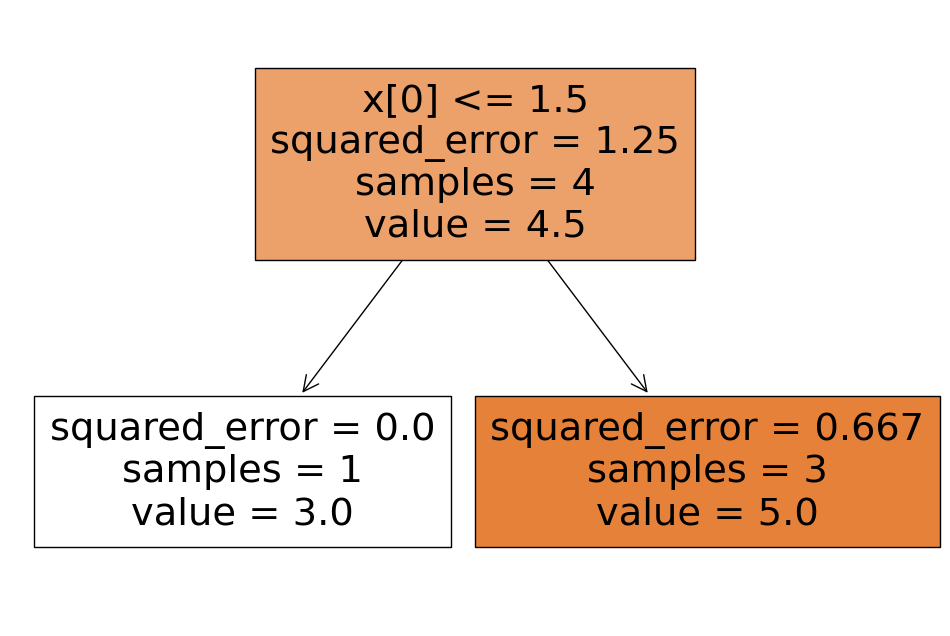

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(reg, filled=True)
plt.show()

In [37]:
print(reg.predict([[2]]))

[12.]


In [45]:
X = [2, 1, 3, 2]
y = [4, 3, 5, 6]

reg = RandomForestRegressor(max_depth=1, n_estimators=2)
reg.fit(np.array(X).reshape(-1, 1), y)

RandomForestRegressor(max_depth=1, n_estimators=2)

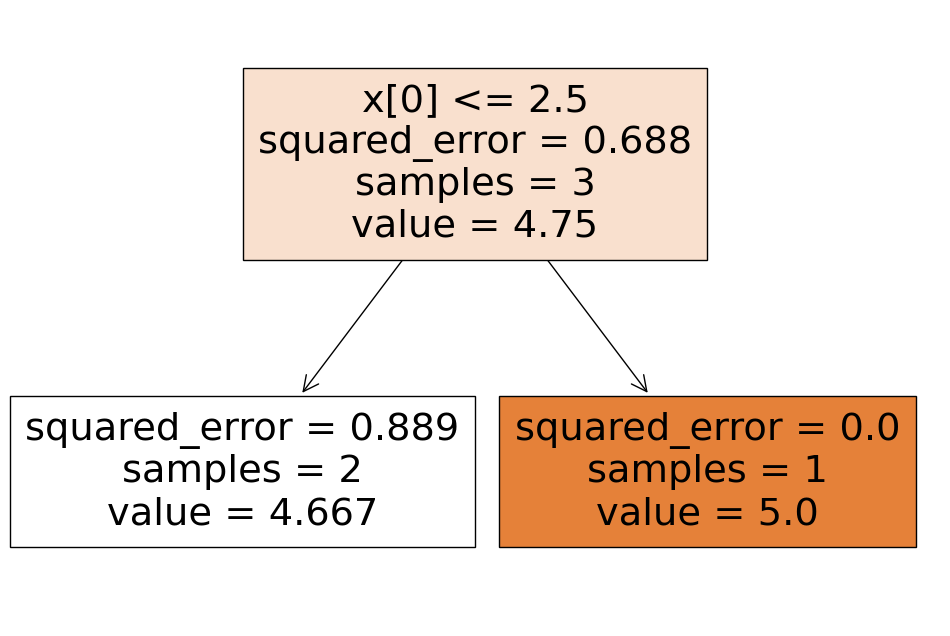

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(reg.estimators_[0], filled=True)
plt.show()